In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df=pd.read_csv('Iris.csv',index_col='Id')

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [6]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df['Species']=LabelEncoder().fit_transform(df['Species'])

In [9]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [10]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

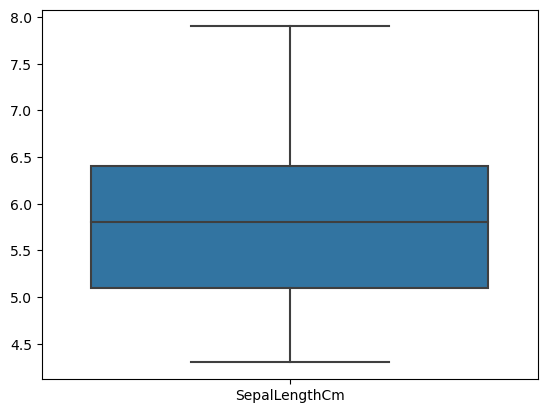

In [12]:
sns.boxplot(df[['SepalLengthCm']])

<Axes: >

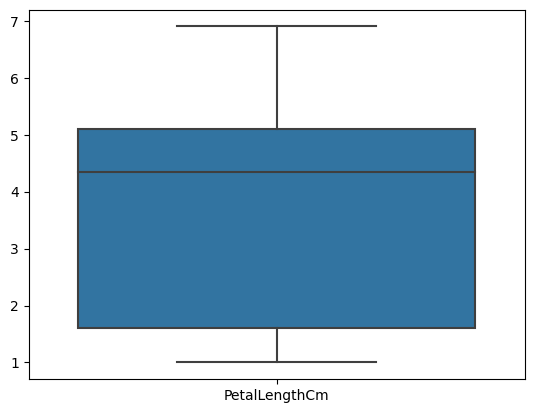

In [13]:
sns.boxplot(df[['PetalLengthCm']])

<Axes: >

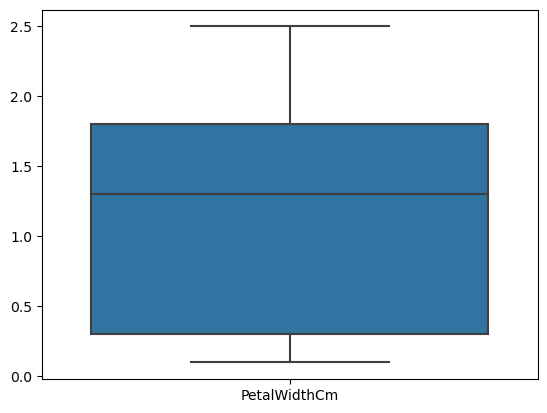

In [14]:
sns.boxplot(df[['PetalWidthCm']])

<Axes: >

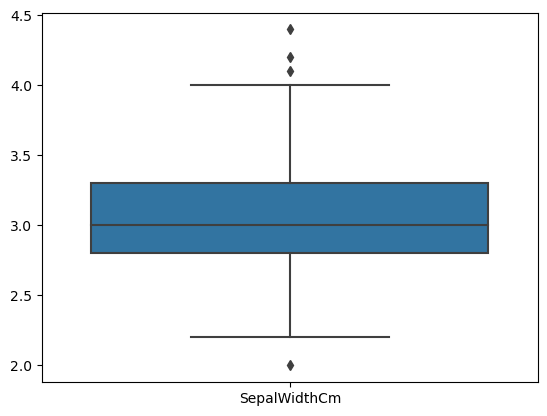

In [15]:
sns.boxplot(df[['SepalWidthCm']])

In [17]:
q1=df.quantile(0.25)['SepalWidthCm']
q3=df.quantile(0.75)['SepalWidthCm']
IQR=q3-q1
ul=q3+(1.5*IQR)
ll=q1-(1.5*IQR)


In [18]:
df['SepalWidthCm'][(df['SepalWidthCm'] < ll)]=df['SepalWidthCm'].median()

/tmp/ipykernel_7794/50357654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SepalWidthCm'][(df['SepalWidthCm'] < ll)]=df['SepalWidthCm'].median()


In [19]:
df['SepalWidthCm'][(df['SepalWidthCm'] > ul)]=df['SepalWidthCm'].median()

/tmp/ipykernel_7794/815761774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SepalWidthCm'][(df['SepalWidthCm'] > ul)]=df['SepalWidthCm'].median()


<Axes: >

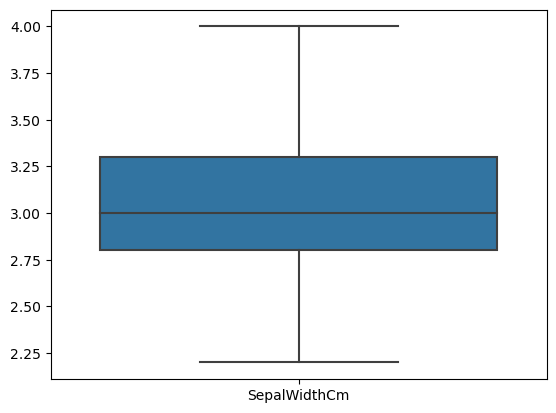

In [21]:
sns.boxplot(df[['SepalWidthCm']])

In [22]:
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]=StandardScaler().fit_transform(df[['PetalWidthCm','PetalLengthCm','SepalLengthCm','SepalWidthCm']])

In [23]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [24]:
model=GaussianNB()

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [30]:
model=GaussianNB()

In [31]:
model.fit(x_train,y_train)

GaussianNB()

In [32]:
result=model.predict(x_test)

In [36]:
cm=confusion_matrix(y_test,result)

In [37]:
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  3,  9]])

In [38]:
df['Species'].unique()

array([0, 1, 2])

In [39]:
def getScore(tp,fn,fp,tn):
    print(f"Accuracy : {(tp+tn)/(tp+fp+fn+tn)}")
    print(f"Error rate : {(fn+fp)/(tp+fp+fn+tn)}")
    print(f"Precisin : {(tp)/(tp+fp)}")
    print(f"Recall : {(tp)/(tp+fn)}")

In [40]:
tp=cm[0][0]
fn=cm[0][1]+cm[0][2]
fp=cm[1][0]+cm[2][0]
tn=cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]
getScore(tp,fn,fp,tn)

Accuracy : 1.0
Error rate : 0.0
Precisin : 1.0
Recall : 1.0


In [41]:
tp = cm[1][1]
tn = cm[0][0] + cm[2][0] + cm[0][2] + cm[2][2]
fn = cm[1][0] + cm[1][2]
fp = cm[0][1] + cm[2][1]
getScore(tp, fn, fp ,tn)

Accuracy : 0.9210526315789473
Error rate : 0.07894736842105263
Precisin : 0.8235294117647058
Recall : 1.0


In [42]:
tp = cm[2][2]
tn = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
fn = cm[2][0] + cm[2][1]
fp = cm[0][2] + cm[1][2]
getScore(tp, fn, fp, tn)

Accuracy : 0.9210526315789473
Error rate : 0.07894736842105263
Precisin : 1.0
Recall : 0.75


In [43]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90        14
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38

